# Exercise M5.01

The aim of this exercise is to repeat part of the previous experiment for a depth with 2 levels to show how the process of partitioning is repeated over time.

Before to start, we'lL:
* load the dataset;
* split the dataset into training and testing dataset;
* define the function to show the classification decision function


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from helper_kit import plot_decision_function
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [24]:
penguins = pd.read_csv('data/penguins_classification.csv')
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [25]:

data, target = penguins[culmen_columns], penguins[target_column]

# split
data_train, data_test, target_train, target_test = train_test_split(data, 
                                                                   target, 
                                                                   random_state=16)

In [26]:
range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns
}

Create a decision tree classifier with a maximum depth of 2 levels and fit the training data. Once this classifier trained, plot the data and the decision boundary to see the benefit of increasing the depth.

In [27]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=2)

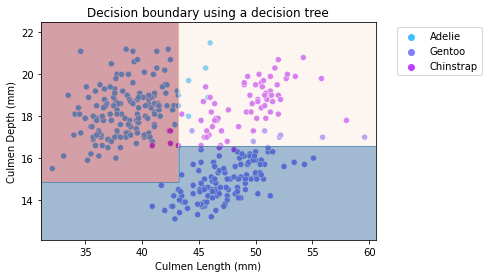

In [28]:
ax = sns.scatterplot(data=penguins, x=culmen_columns[0],
                    y=culmen_columns[1], hue=target_column,
                    palette='cool') 
plot_decision_function(model, range_features, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Decision boundary using a decision tree');

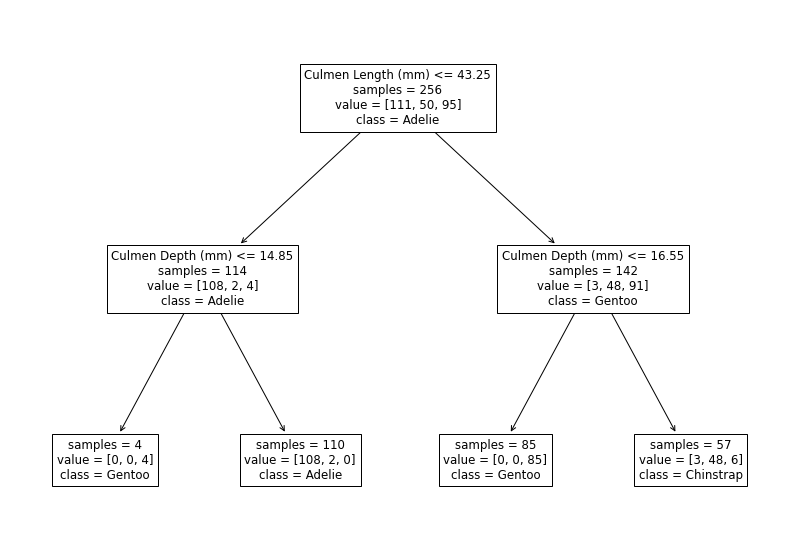

In [29]:
from sklearn.tree import plot_tree
_, ax = plt.subplots(figsize=(14, 10))
plot_tree(model, feature_names=culmen_columns, class_names=model.classes_,
         impurity=False, ax=ax);

In [30]:
score = model.score(data_test, target_test)
print(f"Accuray of the model = {score:.2f}")

Accuray of the model = 0.91
